## Imports and Setup

In [1]:
from helper_functions import pd, os, shutil
from helper_functions import convert_samples_to_binary, get_column_data_types, print_library_versions, add_id_column, order_columns_by_correlation, organize_photos_in_folders

### Try to get library versions matching the following:

In [2]:
print_library_versions()

pandas version:           1.4.1
matplotlib version:       3.5.1
numpy version:            1.18.5
bitstring version:        3.1.9
joblib version:           1.1.0
PIL version:              8.2.0


## Data Loading and Cleaning

In [3]:
# FIXME - update the filename to point to your dataset
filename = '/mnt/sda1/DDoS.csv'
df = pd.read_csv(filename)

### Spend some time familiarizing yourself with your dataset. Here are some basic commands

In [4]:
df.head()

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label
0,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
2,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
3,17,1,2,0,2832.0,0.0,1416.0,1416.0,1416.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 199992 entries, 0 to 199991
Data columns (total 70 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Protocol                     199992 non-null  int64  
 1   Flow Duration                199992 non-null  int64  
 2   Total Fwd Packets            199992 non-null  int64  
 3   Total Backward Packets       199992 non-null  int64  
 4   Total Length of Fwd Packets  199992 non-null  float64
 5   Total Length of Bwd Packets  199992 non-null  float64
 6   Fwd Packet Length Max        199992 non-null  float64
 7   Fwd Packet Length Min        199992 non-null  float64
 8   Fwd Packet Length Mean       199992 non-null  float64
 9   Fwd Packet Length Std        199992 non-null  float64
 10  Bwd Packet Length Max        199992 non-null  float64
 11  Bwd Packet Length Min        199992 non-null  float64
 12  Bwd Packet Length Mean       199992 non-null  float64
 13 

# Data Cleaning

In [6]:
# FIXME - update the function if necessary for the 'name' value
def add_id_column(df: pd.DataFrame, column_name: str) -> pd.DataFrame:
    """
    Adds a new column to a pandas DataFrame with unique identifiers for each value in a specified column.

    Args:
        df (pandas.DataFrame): The DataFrame to modify.
        column_name (str): The name of the column to use for generating unique identifiers.

    Returns:
        pandas.DataFrame: The modified DataFrame with the new 'Id' column.
    """
    if 'Id' not in df.columns:
        df['Id'] = ''

    unique_values = df[column_name].unique().tolist()
    values_dict = {value: 0 for value in unique_values}
    for index, row in df.iterrows():
        value = row[column_name]
        values_dict[value] += 1
        name = str(values_dict[value]) + "-" + value
        df.at[index, 'Id'] = name
    return df

In [7]:
df['Label'].value_counts()

DNS        16666
LDAP       16666
MSSQL      16666
NetBIOS    16666
NTP        16666
Portmap    16666
SNMP       16666
SSDP       16666
Syn        16666
TFTP       16666
UDP        16666
UDPLag     16666
Name: Label, dtype: int64

In [8]:
# FIXME - change the value 'species' to match the 'y' value of your dataset
# This function will give your dataframe an 'id' column which will be used to identify the samples in the dataset
# The 'id' column will be used to name the photos of the samples
classification_id = 'Label'
df = add_id_column(df, classification_id)
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Id
0,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,1-DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,2-DNS
2,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,3-DNS
3,17,1,2,0,2832.0,0.0,1416.0,1416.0,1416.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,4-DNS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,5-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199987,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16662-UDPLag
199988,6,3307134,21,24,1426.0,2834.0,440.0,0.0,67.904762,126.747349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16663-UDPLag
199989,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16664-UDPLag
199990,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16665-UDPLag


In [9]:
# drop 0 value columns
zero_cols = df.columns[df.eq(0).all(axis=0)]
df = df.drop(zero_cols, axis=1)
df

,Protocol,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Id
0,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,1-DNS
1,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,2-DNS
2,17,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,3-DNS
3,17,1,2,0,2832.0,0.0,1416.0,1416.0,1416.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,4-DNS
4,17,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,5-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199987,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16662-UDPLag
199988,6,3307134,21,24,1426.0,2834.0,440.0,0.0,67.904762,126.747349,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16663-UDPLag
199989,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16664-UDPLag
199990,6,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16665-UDPLag


In [10]:
df = df.drop('Protocol', axis=1)
df

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Inbound,Label,Id
0,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,1-DNS
1,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,2-DNS
2,2,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,3-DNS
3,1,2,0,2832.0,0.0,1416.0,1416.0,1416.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,4-DNS
4,1,2,0,2944.0,0.0,1472.0,1472.0,1472.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,DNS,5-DNS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199987,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16662-UDPLag
199988,3307134,21,24,1426.0,2834.0,440.0,0.0,67.904762,126.747349,976.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16663-UDPLag
199989,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16664-UDPLag
199990,1,2,0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1,UDPLag,16665-UDPLag


In [11]:
x = df.drop([classification_id, 'Id'], axis=1)
Y = df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (199992, 64)
Y (199992,)
This value should be True: True


## Image Generation

In [21]:
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-results-DDoS"
feature_types = get_column_data_types(x)
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1]


In [23]:
for index, column in enumerate(x.columns):
    print(f"{column}: ",end="")
    if feature_types[index] == 0:
        print("float")
    elif feature_types[index] == 1:
        print("int")
    elif feature_types[index] == 2:
        print("bool")

Flow Duration: int
Total Fwd Packets: int
Total Backward Packets: int
Total Length of Fwd Packets: float
Total Length of Bwd Packets: float
Fwd Packet Length Max: float
Fwd Packet Length Min: float
Fwd Packet Length Mean: float
Fwd Packet Length Std: float
Bwd Packet Length Max: float
Bwd Packet Length Min: float
Bwd Packet Length Mean: float
Bwd Packet Length Std: float
Flow Bytes/s: float
Flow Packets/s: float
Flow IAT Mean: float
Flow IAT Std: float
Flow IAT Max: float
Flow IAT Min: float
Fwd IAT Total: float
Fwd IAT Mean: float
Fwd IAT Std: float
Fwd IAT Max: float
Fwd IAT Min: float
Bwd IAT Total: float
Bwd IAT Mean: float
Bwd IAT Std: float
Bwd IAT Max: float
Bwd IAT Min: float
Fwd Header Length: int
Bwd Header Length: int
Fwd Packets/s: float
Bwd Packets/s: float
Min Packet Length: float
Max Packet Length: float
Packet Length Mean: float
Packet Length Std: float
Packet Length Variance: float
SYN Flag Count: int
RST Flag Count: int
ACK Flag Count: int
URG Flag Count: int
CWE Flag

In [24]:
convert_samples_to_binary(x, df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 199992 samples to binary: 54.286376953125 seconds. Seconds per sample = 0.000271442742475324


## Place Folders into the Correct Categories

In [21]:
def organize_photos_in_folders(image_directory : str, Y : pd.DataFrame) -> None:
    '''
        Organize the photos in the folder into subfolders based on the label
        
        Args:
            image_directory (str): The directory to save the images to.
            Y (pd.DataFrame): The pandas dataframe ids values to be converted to binary.
    '''
    dirs = Y.unique().tolist()
    if not os.path.exists(image_directory + '/data'):
        os.mkdir(image_directory + '/data')
    new_dir = image_directory + '/data/'
    if not os.path.exists(new_dir+'Train/'):
        os.mkdir(new_dir+'Train/')
    for i in dirs:
        i = str(i)
        if not os.path.exists(new_dir+'Train/'+i):
            os.mkdir(new_dir+'Train/'+i)
    total_images = 0
    type_counts = {value: 0 for value in dirs}
    for file in os.listdir(image_directory):
        try:
            dir = file.split("-")[1].split(".")[0]
            type_counts[dir]+=1
        except:
            continue
        shutil.move(f"{image_directory}/{file}", f"{new_dir}Train/{dir}/{file}")
        total_images += 1
    print(total_images)
    print(type_counts)

In [29]:
organize_photos_in_folders(image_directory, Y)

199992
{'DNS': 16666, 'LDAP': 16666, 'MSSQL': 16666, 'NetBIOS': 16666, 'NTP': 16666, 'Portmap': 16666, 'SNMP': 16666, 'SSDP': 16666, 'Syn': 16666, 'TFTP': 16666, 'UDP': 16666, 'UDPLag': 16666}


In [ ]:
#FIXME Upload your photos to the Google Drive Data Folder!

## Train ResNet50
If you used my yaml files where there are two conda environments, this is the stage where you will change to the `keras_gpu` environment. If you used the alternative method, you should be in the correct environment already.

### Once experiments are running, view the live updates on TensorBoard
Run the command `tensorboard --logdir=[your log directory]` in the terminal. 
<br />
<br />
Then, open a browser and navigate to `localhost:6006`.
<br />
<br />
![TensorBoard](./imgs/tensorboard.png)

In [1]:
from resnet import print_dl_versions, train_resnet_model_k_fold, evaluate_on_test_data, plot_metrics

2023-03-29 19:57:42.842662: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.10.1


In [2]:
# FIXME - update the values below to match your dataset
# Multiple of 2 such that it is greater than or equal to the number of features you have
img_size = 64
target_size = (img_size,img_size)
# Number of classification types (classes) in your dataset
num_classes = 12
# Number of samples to run through the model before updating the weights
# Higher batch size means more memory is required and training will be faster. Maybe use 64 for larger datasets
batch_size = 64
# Number of times to run through training a model
# Depending on the size of your dataset, you may want to increase/decrease this number
num_folds = 5
# Number of times to run through the entire dataset
number_of_epochs = 100

In [ ]:
image_directory = "/mnt/sda1/image-results-DDoS"
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [4]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.4861940085887909, 'acc': 0.7611765384674072, 'f1_m': 0.7579238295555115, 'precision_m': 0.7723375558853149, 'recall_m': 0.7443577527999878, 'auc': 0.9875785708427429, 'false_negatives': 39280.0, 'false_positives': 33716.0, 'true_negatives': 1726240.0, 'true_positives': 120716.0, 'mean_absolute_error': 0.050354902446269986, 'mean_squared_error': 0.02519289553165436, 'val_loss': 0.58646080493927, 'val_acc': 0.7349134922027588, 'val_f1_m': 0.7329187870025635, 'val_precision_m': 0.7440137028694153, 'val_recall_m': 0.7223336577415467, 'val_auc': 0.9792619943618774, 'val_false_negatives': 11185.0, 'val_false_positives': 9936.0, 'val_true_negatives': 430020.0, 'val_true_positives': 28811.0, 'val_mean_absolute_error': 0.05408601313829422, 'val_mean_squared_error': 0.02855540215969086, 'lr': 0.0017999998992308975}


In [5]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.49142205715179443, 'acc': 0.7589064836502075, 'f1_m': 0.7555488348007202, 'precision_m': 0.7702149152755737, 'recall_m': 0.7417441606521606, 'auc_3': 0.98635333776474, 'false_negatives_3': 41320.0, 'false_positives_3': 35423.0, 'true_negatives_3': 1724533.0, 'true_positives_3': 118676.0, 'mean_absolute_error': 0.05092557892203331, 'mean_squared_error': 0.025475645437836647, 'val_loss': 0.5738045573234558, 'val_acc': 0.7378987669944763, 'val_f1_m': 0.7360432744026184, 'val_precision_m': 0.7466756105422974, 'val_recall_m': 0.7258766889572144, 'val_auc_3': 0.9810950756072998, 'val_false_negatives_3': 10964.0, 'val_false_positives_3': 9849.0, 'val_true_negatives_3': 430107.0, 'val_true_positives_3': 29032.0, 'val_mean_absolute_error': 0.0536397285759449, 'val_mean_squared_error': 0.028217561542987823, 'lr': 0.0019999999}


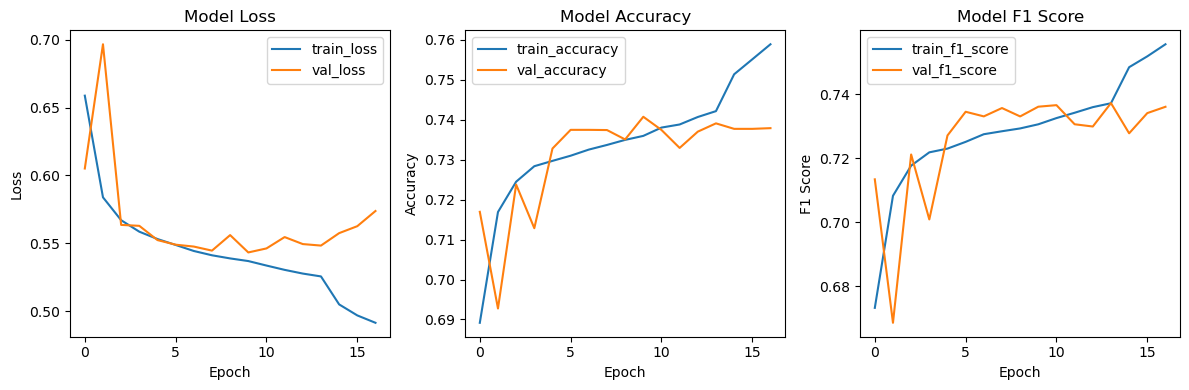

In [6]:
plot_metrics(best_model.history)

# Correlated Binary Encoding

In [7]:
#FIXME - update the directories to point where you would like
image_directory = "/mnt/sda1/image-results-iris-correlated"
new_dir = image_directory + '/data/'
classification_id = 'Label'

In [24]:
correlated_order = order_columns_by_correlation(df, classification_id, True)

ordering columns by correlation: Label, 66, ['DNS' 'LDAP' 'MSSQL' 'NetBIOS' 'NTP' 'Portmap' 'SNMP' 'SSDP' 'Syn' 'TFTP'
 'UDP' 'UDPLag']


In [25]:
correlated_df = df.reindex(columns=correlated_order)

In [26]:
x = correlated_df.drop([classification_id, 'Id'], axis=1)
Y = correlated_df[classification_id]
print(f"x {x.shape}")
print(f"Y {Y.shape}")
print(f"This value should be True: {x.shape[0] == Y.shape[0]}")

x (199992, 64)
Y (199992,)
This value should be True: True


In [29]:
# FIXME - update the image directory to point to a directory where you want the images to be saved. Create a folder there.
# Change any other constants you want to change
image_directory = "/mnt/sda1/image-DDoS-iris-correlated"
feature_types = get_column_data_types(x)
# For feature_types, 0 = float, 1 = int, 2 = bool
# FIXME - update `image_directory`` to point to a directory where you want the images to be saved. 
# Change any other constants you want to change
# Precision: the number of binary digits to use for each feature (use a power of 2)
precision = 64
# one: the value to use for a 1 in the binary representation (128 is a dark pixel)
one = 128
zero = 0
# num_jobs: the number of jobs to run in parallel (-1 means use all available cores)
n_jobs = -1
# For feature_types, 0 = float, 1 = int, 2 = bool
# Notice mine are all 0's because I only have float values in my dataset, you may have different values
print(feature_types)

[0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1]


In [30]:
convert_samples_to_binary(x, correlated_df["Id"], image_directory, precision, one, zero, n_jobs, feature_types)

Time to convert 199992 samples to binary: 53.28947377204895 seconds. Seconds per sample = 0.000266458027181332


In [31]:
organize_photos_in_folders(image_directory, Y)

199992
{'DNS': 16666, 'LDAP': 16666, 'MSSQL': 16666, 'NetBIOS': 16666, 'NTP': 16666, 'Portmap': 16666, 'SNMP': 16666, 'SSDP': 16666, 'Syn': 16666, 'TFTP': 16666, 'UDP': 16666, 'UDPLag': 16666}


In [ ]:
image_directory = "/mnt/sda1/image-results-DDoS-correlated"
new_dir = image_directory + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{image_directory}/results/", num_folds, batch_size)

In [9]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.4866412401199341, 'acc': 0.7627878308296203, 'f1_m': 0.7593008637428283, 'precision_m': 0.7739933729171753, 'recall_m': 0.7455095052719116, 'auc_5': 0.9867720603942871, 'false_negatives_5': 40745.0, 'false_positives_5': 34661.0, 'true_negatives_5': 1725295.0, 'true_positives_5': 119251.0, 'mean_absolute_error': 0.05018845200538635, 'mean_squared_error': 0.02509692758321762, 'val_loss': 0.5843269467353821, 'val_acc': 0.7356385588645935, 'val_f1_m': 0.7328009247779846, 'val_precision_m': 0.7460265278816223, 'val_recall_m': 0.7202583193778992, 'val_auc_5': 0.9806101322174072, 'val_false_negatives_5': 11119.0, 'val_false_positives_5': 9740.0, 'val_true_negatives_5': 430216.0, 'val_true_positives_5': 28877.0, 'val_mean_absolute_error': 0.05396497994661331, 'val_mean_squared_error': 0.028582264482975007, 'lr': 0.0017999998992308975}


In [10]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.5008665919303894, 'acc': 0.7543001174926758, 'f1_m': 0.7504375576972961, 'precision_m': 0.7666035294532776, 'recall_m': 0.735310435295105, 'auc_9': 0.9858496189117432, 'false_negatives_9': 42349.0, 'false_positives_9': 35834.0, 'true_negatives_9': 1724122.0, 'true_positives_9': 117647.0, 'mean_absolute_error': 0.051763929426670074, 'mean_squared_error': 0.025891799479722977, 'val_loss': 0.5626069903373718, 'val_acc': 0.7382737994194031, 'val_f1_m': 0.7367708086967468, 'val_precision_m': 0.7465289235115051, 'val_recall_m': 0.7274149656295776, 'val_auc_9': 0.9819685220718384, 'val_false_negatives_9': 10902.0, 'val_false_positives_9': 9879.0, 'val_true_negatives_9': 430077.0, 'val_true_positives_9': 29094.0, 'val_mean_absolute_error': 0.05373670905828476, 'val_mean_squared_error': 0.02815764583647251, 'lr': 0.0019999999}


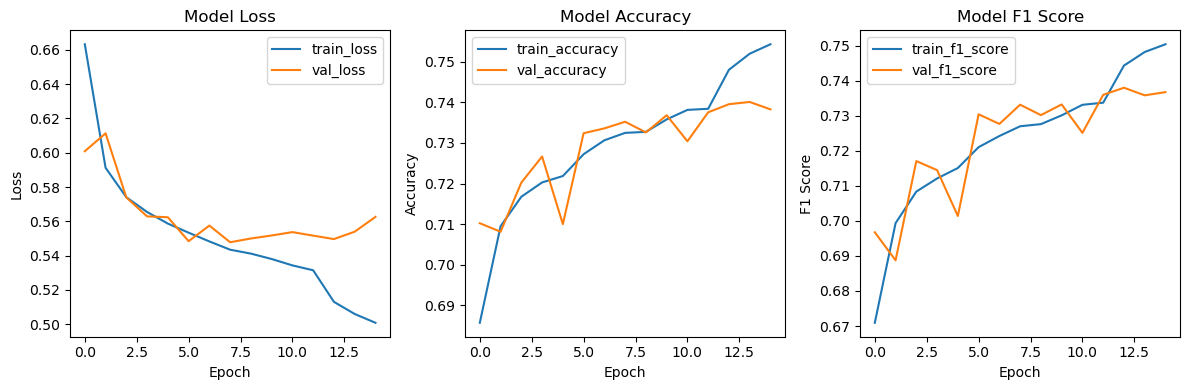

In [11]:
plot_metrics(best_model.history)

# IGTD

In [12]:
from IGTD_Functions import min_max_transform, table_to_image, generate_feature_distance_ranking,generate_matrix_distance_ranking,IGTD,run

In [4]:
save_image_size = 3 # Size of ranking pictures
max_step = 100000    # The maximum number of iterations to run the IGTD algorithm, if it does not converge.
val_step = 300  # The number of iterations for determining algorithm convergence. If the error reduction rate
                # is smaller than a pre-set threshold for val_step itertions, the algorithm converges.
fea_dist_method = 'Euclidean'
image_dist_method = 'Euclidean'
error = 'squared'
result_dir = '/mnt/sda1/image-results-DDoS-IGTD'

In [14]:
def normalize_data(data):
    norm_data = min_max_transform(data.values)
    norm_data = pd.DataFrame(norm_data, columns=data.columns, index=data.index)
    return norm_data

In [15]:
df = df.set_index('Id')

In [16]:
normalized_data = normalize_data(df.drop([classification_id], axis=1))

In [19]:
scale,coordinate,normDir,min_id,index = table_to_image(normalized_data, [8, 8], fea_dist_method, image_dist_method, save_image_size,
            max_step, val_step, result_dir, error)

Step 0 err: 1328456592.5
Step 1 err: 1294149880.5
Step 2 err: 1255727128.5
Step 3 err: 1216901374.5
Step 4 err: 1196158879.5
Step 5 err: 1171609291.5
Step 6 err: 1164415453.5
Step 7 err: 1156837151.5
Step 8 err: 1144229677.5
Step 9 err: 1111869435.5
Step 10 err: 1092169234.5
Step 11 err: 1075752205.5
Step 12 err: 1059389105.5
Step 13 err: 1051751773.5
Step 14 err: 1041597902.5
Step 15 err: 1038321322.5
Step 16 err: 1021485956.5
Step 17 err: 1001503175.5
Step 18 err: 980268015.5
Step 19 err: 974577341.5
Step 20 err: 960462353.5
Step 21 err: 944322380.5
Step 22 err: 940230760.5
Step 23 err: 913077323.5
Step 24 err: 904086229.5
Step 25 err: 895918852.5
Step 26 err: 894241260.5
Step 27 err: 886429927.5
Step 28 err: 878064629.5
Step 29 err: 869983514.5
Step 30 err: 867829085.5
Step 31 err: 865159607.5
Step 32 err: 861124354.5
Step 33 err: 858595376.5
Step 34 err: 854880537.5
Step 35 err: 842541177.5
Step 36 err: 838523165.5
Step 37 err: 836417895.5
Step 38 err: 830775747.5
Step 39 err: 8280

In [20]:
run(normalized_data, index, min_id, scale, coordinate,normDir)

In [22]:
organize_photos_in_folders(result_dir+'/data', Y)

199992
{'DNS': 16666, 'LDAP': 16666, 'MSSQL': 16666, 'NetBIOS': 16666, 'NTP': 16666, 'Portmap': 16666, 'SNMP': 16666, 'SSDP': 16666, 'Syn': 16666, 'TFTP': 16666, 'UDP': 16666, 'UDPLag': 16666}


In [6]:
new_dir = result_dir + '/data'
average_history, best_model = train_resnet_model_k_fold(num_classes, img_size, f"{new_dir}/Train/", number_of_epochs, f"{result_dir}/results/", num_folds, batch_size)

Fold:  0
Found 159996 images belonging to 12 classes.
Found 39996 images belonging to 12 classes.


2023-03-29 19:58:41.001310: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 19:58:41.001337: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-29 19:58:41.001363: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1365] Profiler found 1 GPUs
2023-03-29 19:58:41.001920: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcupti.so.10.1
2023-03-29 19:58:41.069485: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 19:58:41.069583: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-29 19:58:41.160179: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:116] None of the MLIR optimization passes are enabled (registered 2)
2023-03-29 19:58:41.179013: I tensorflow/core/platform/profile_utils/cpu_utils.cc:112] CPU Frequency: 4200000000 Hz


Epoch 1/100


2023-03-29 19:58:44.931642: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcublas.so.10
2023-03-29 19:58:45.077159: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudnn.so.7
2023-03-29 19:58:45.659735: W tensorflow/stream_executor/gpu/asm_compiler.cc:63] Running ptxas --version returned 256
2023-03-29 19:58:45.713935: W tensorflow/stream_executor/gpu/redzone_allocator.cc:314] Internal: ptxas exited with non-zero error code 256, output: 
Relying on driver to perform ptx compilation. 
Modify $PATH to customize ptxas location.
This message will be only logged once.


   2/2500 [..............................] - ETA: 8:58 - loss: 3.2456 - acc: 0.0664 - f1_m: 0.0270 - precision_m: 0.1000 - recall_m: 0.0156 - auc: 0.5082 - false_negatives: 94.5000 - false_positives: 13.5000 - true_negatives: 1042.5000 - true_positives: 1.5000 - mean_absolute_error: 0.1528 - mean_squared_error: 0.0884  

2023-03-29 19:59:23.434092: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 19:59:23.434121: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   4/2500 [..............................] - ETA: 7:21 - loss: 3.0086 - acc: 0.0951 - f1_m: 0.0391 - precision_m: 0.1729 - recall_m: 0.0244 - auc: 0.5579 - false_negatives: 155.2500 - false_positives: 21.2500 - true_negatives: 1738.7500 - true_positives: 4.7500 - mean_absolute_error: 0.1494 - mean_squared_error: 0.0846

2023-03-29 19:59:23.518835: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-29 19:59:23.520632: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-29 19:59:23.532154: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1744 callback api events and 1692 activity events. 
2023-03-29 19:59:23.563593: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 19:59:23.594648: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_19_59_23
2023-03-29 19:59:23.618040: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_19_59_23/drake-pc.trace.json.gz
2023-03-29 19:59:23.673227: I tenso

2500/2500 [==============================] - 265s 89ms/step - loss: 0.9215 - acc: 0.5821 - f1_m: 0.5402 - precision_m: 0.6223 - recall_m: 0.4847 - auc: 0.9549 - false_negatives: 39177.4190 - false_positives: 22839.5770 - true_negatives: 857822.2527 - true_positives: 40882.7473 - mean_absolute_error: 0.0806 - mean_squared_error: 0.0421 - val_loss: 1.0473 - val_acc: 0.6089 - val_f1_m: 0.5130 - val_precision_m: 0.6044 - val_recall_m: 0.4468 - val_auc: 0.9506 - val_false_negatives: 22126.0000 - val_false_positives: 11690.0000 - val_true_negatives: 428266.0000 - val_true_positives: 17870.0000 - val_mean_absolute_error: 0.0800 - val_mean_squared_error: 0.0447

Epoch 00001: val_acc improved from -inf to 0.60891, saving model to /mnt/sda1/image-results-DDoS-IGTD/results/fold0-resnet50v2-saved-model-01-val_acc-0.61.hdf5
Epoch 2/100
2500/2500 [==============================] - 183s 73ms/step - loss: 0.7185 - acc: 0.6436 - f1_m: 0.6175 - precision_m: 0.6857 - recall_m: 0.5658 - auc: 0.9715 - fals

2023-03-29 21:24:47.956844: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 21:24:47.956871: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-29 21:24:47.956990: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 21:24:47.957045: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/2500 [..............................] - ETA: 7:56 - loss: 2.9716 - acc: 0.1016 - f1_m: 0.0070 - precision_m: 0.0357 - recall_m: 0.0039 - auc_1: 0.5097 - false_negatives_1: 95.5000 - false_positives_1: 7.0000 - true_negatives_1: 1049.0000 - true_positives_1: 0.5000 - mean_absolute_error: 0.1527 - mean_squared_error: 0.0857                  

2023-03-29 21:24:51.826254: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 21:24:51.826281: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   5/2500 [..............................] - ETA: 9:36 - loss: 2.7727 - acc: 0.1407 - f1_m: 0.0483 - precision_m: 0.1604 - recall_m: 0.0293 - auc_1: 0.5671 - false_negatives_1: 184.6000 - false_positives_1: 18.0000 - true_negatives_1: 2094.0000 - true_positives_1: 7.4000 - mean_absolute_error: 0.1483 - mean_squared_error: 0.0819 

2023-03-29 21:24:52.234033: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-29 21:24:52.237798: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-29 21:24:52.248141: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1744 callback api events and 1692 activity events. 
2023-03-29 21:24:52.295736: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 21:24:52.329253: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_21_24_52
2023-03-29 21:24:52.352196: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_21_24_52/drake-pc.trace.json.gz
2023-03-29 21:24:52.416918: I tenso

2500/2500 [==============================] - 197s 77ms/step - loss: 0.9598 - acc: 0.5657 - f1_m: 0.5209 - precision_m: 0.6088 - recall_m: 0.4643 - auc_1: 0.9516 - false_negatives_1: 40416.2775 - false_positives_1: 23147.9084 - true_negatives_1: 857539.9764 - true_positives_1: 39646.2575 - mean_absolute_error: 0.0833 - mean_squared_error: 0.0434 - val_loss: 1.1688 - val_acc: 0.4992 - val_f1_m: 0.4655 - val_precision_m: 0.5193 - val_recall_m: 0.4225 - val_auc_1: 0.9414 - val_false_negatives_1: 23096.0000 - val_false_positives_1: 15653.0000 - val_true_negatives_1: 424303.0000 - val_true_positives_1: 16900.0000 - val_mean_absolute_error: 0.0897 - val_mean_squared_error: 0.0517

Epoch 00001: val_acc improved from -inf to 0.49920, saving model to /mnt/sda1/image-results-DDoS-IGTD/results/fold1-resnet50v2-saved-model-01-val_acc-0.50.hdf5
Epoch 2/100
2500/2500 [==============================] - 192s 77ms/step - loss: 0.7164 - acc: 0.6472 - f1_m: 0.6200 - precision_m: 0.6940 - recall_m: 0.5646 

2023-03-29 22:30:45.895310: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 22:30:45.895335: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-29 22:30:45.895468: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 22:30:45.895524: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/2500 [..............................] - ETA: 7:43 - loss: 3.2304 - acc: 0.1016 - f1_m: 0.0461 - precision_m: 0.1458 - recall_m: 0.0273 - auc_2: 0.5382 - false_negatives_2: 92.5000 - false_positives_2: 19.5000 - true_negatives_2: 1036.5000 - true_positives_2: 3.5000 - mean_absolute_error: 0.1511 - mean_squared_error: 0.0888                  

2023-03-29 22:30:49.860766: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 22:30:49.860791: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   4/2500 [..............................] - ETA: 11:28 - loss: 3.0995 - acc: 0.1143 - f1_m: 0.0589 - precision_m: 0.1777 - recall_m: 0.0355 - auc_2: 0.5509 - false_negatives_2: 153.2500 - false_positives_2: 33.0000 - true_negatives_2: 1727.0000 - true_positives_2: 6.7500 - mean_absolute_error: 0.1497 - mean_squared_error: 0.0874

2023-03-29 22:30:50.267968: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-29 22:30:50.270650: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-29 22:30:50.280523: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1744 callback api events and 1692 activity events. 
2023-03-29 22:30:50.312480: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 22:30:50.341939: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_22_30_50
2023-03-29 22:30:50.364148: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_22_30_50/drake-pc.trace.json.gz
2023-03-29 22:30:50.419687: I tenso

2500/2500 [==============================] - 197s 77ms/step - loss: 0.9647 - acc: 0.5618 - f1_m: 0.5130 - precision_m: 0.6110 - recall_m: 0.4525 - auc_2: 0.9514 - false_negatives_2: 41305.3359 - false_positives_2: 22621.4270 - true_negatives_2: 858050.6417 - true_positives_2: 38755.7613 - mean_absolute_error: 0.0837 - mean_squared_error: 0.0436 - val_loss: 1.7382 - val_acc: 0.4862 - val_f1_m: 0.3697 - val_precision_m: 0.5896 - val_recall_m: 0.2708 - val_auc_2: 0.8730 - val_false_negatives_2: 29167.0000 - val_false_positives_2: 7542.0000 - val_true_negatives_2: 432414.0000 - val_true_positives_2: 10829.0000 - val_mean_absolute_error: 0.0963 - val_mean_squared_error: 0.0578

Epoch 00001: val_acc improved from -inf to 0.48617, saving model to /mnt/sda1/image-results-DDoS-IGTD/results/fold2-resnet50v2-saved-model-01-val_acc-0.49.hdf5
Epoch 2/100
2500/2500 [==============================] - 192s 77ms/step - loss: 0.7319 - acc: 0.6391 - f1_m: 0.6085 - precision_m: 0.6819 - recall_m: 0.5544 -

2023-03-29 23:56:06.610973: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 23:56:06.610999: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-29 23:56:06.611130: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 23:56:06.611185: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/2500 [..............................] - ETA: 7:26 - loss: 2.8284 - acc: 0.1562 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - auc_3: 0.5778 - false_negatives_3: 96.0000 - false_positives_3: 8.5000 - true_negatives_3: 1047.5000 - true_positives_3: 0.0000e+00 - mean_absolute_error: 0.1486 - mean_squared_error: 0.0810  

2023-03-29 23:56:10.601853: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-29 23:56:10.601878: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   4/2500 [..............................] - ETA: 11:06 - loss: 2.7994 - acc: 0.1699 - f1_m: 0.0202 - precision_m: 0.0382 - recall_m: 0.0140 - auc_3: 0.5813 - false_negatives_3: 156.5000 - false_positives_3: 19.0000 - true_negatives_3: 1741.0000 - true_positives_3: 3.5000 - mean_absolute_error: 0.1477 - mean_squared_error: 0.0809            

2023-03-29 23:56:10.999647: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-29 23:56:11.001931: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-29 23:56:11.011220: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1744 callback api events and 1692 activity events. 
2023-03-29 23:56:11.040784: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-29 23:56:11.069935: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_23_56_11
2023-03-29 23:56:11.092398: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_29_23_56_11/drake-pc.trace.json.gz
2023-03-29 23:56:11.146495: I tenso

2500/2500 [==============================] - 198s 78ms/step - loss: 0.9755 - acc: 0.5598 - f1_m: 0.5130 - precision_m: 0.6016 - recall_m: 0.4551 - auc_3: 0.9502 - false_negatives_3: 41285.9600 - false_positives_3: 23204.1675 - true_negatives_3: 857472.9328 - true_positives_3: 38775.5946 - mean_absolute_error: 0.0839 - mean_squared_error: 0.0438 - val_loss: 2.3745 - val_acc: 0.3033 - val_f1_m: 0.2998 - val_precision_m: 0.3759 - val_recall_m: 0.2502 - val_auc_3: 0.8356 - val_false_negatives_3: 29989.0000 - val_false_positives_3: 16607.0000 - val_true_negatives_3: 423349.0000 - val_true_positives_3: 10007.0000 - val_mean_absolute_error: 0.1151 - val_mean_squared_error: 0.0790

Epoch 00001: val_acc improved from -inf to 0.30328, saving model to /mnt/sda1/image-results-DDoS-IGTD/results/fold3-resnet50v2-saved-model-01-val_acc-0.30.hdf5
Epoch 2/100
2500/2500 [==============================] - 194s 77ms/step - loss: 0.7247 - acc: 0.6434 - f1_m: 0.6139 - precision_m: 0.6885 - recall_m: 0.5585 

2023-03-30 01:13:09.227149: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-30 01:13:09.227173: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.
2023-03-30 01:13:09.227278: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-30 01:13:09.227333: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed


Epoch 1/100
   2/2500 [..............................] - ETA: 7:25 - loss: 3.1439 - acc: 0.0430 - f1_m: 0.0000e+00 - precision_m: 0.0000e+00 - recall_m: 0.0000e+00 - auc_4: 0.5095 - false_negatives_4: 96.0000 - false_positives_4: 14.5000 - true_negatives_4: 1041.5000 - true_positives_4: 0.0000e+00 - mean_absolute_error: 0.1541 - mean_squared_error: 0.0876  

2023-03-30 01:13:12.920770: I tensorflow/core/profiler/lib/profiler_session.cc:136] Profiler session initializing.
2023-03-30 01:13:12.920795: I tensorflow/core/profiler/lib/profiler_session.cc:155] Profiler session started.


   4/2500 [..............................] - ETA: 11:15 - loss: 2.9904 - acc: 0.0905 - f1_m: 0.0381 - precision_m: 0.1094 - recall_m: 0.0231 - auc_4: 0.5421 - false_negatives_4: 154.7500 - false_positives_4: 21.0000 - true_negatives_4: 1739.0000 - true_positives_4: 5.2500 - mean_absolute_error: 0.1505 - mean_squared_error: 0.0847             

2023-03-30 01:13:13.323249: I tensorflow/core/profiler/lib/profiler_session.cc:71] Profiler session collecting data.
2023-03-30 01:13:13.325378: I tensorflow/core/profiler/internal/gpu/cupti_tracer.cc:1487] CUPTI activity buffer flushed
2023-03-30 01:13:13.334762: I tensorflow/core/profiler/internal/gpu/cupti_collector.cc:228]  GpuTracer has collected 1744 callback api events and 1692 activity events. 
2023-03-30 01:13:13.364223: I tensorflow/core/profiler/lib/profiler_session.cc:172] Profiler session tear down.
2023-03-30 01:13:13.394086: I tensorflow/core/profiler/rpc/client/save_profile.cc:137] Creating directory: /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_30_01_13_13
2023-03-30 01:13:13.416461: I tensorflow/core/profiler/rpc/client/save_profile.cc:143] Dumped gzipped tool data for trace.json.gz to /mnt/sda1/image-results-DDoS-IGTD/results/tb_logs/train/plugins/profile/2023_03_30_01_13_13/drake-pc.trace.json.gz
2023-03-30 01:13:13.470233: I tenso

2500/2500 [==============================] - 198s 78ms/step - loss: 0.9612 - acc: 0.5658 - f1_m: 0.5223 - precision_m: 0.6060 - recall_m: 0.4666 - auc_4: 0.9514 - false_negatives_4: 40430.9740 - false_positives_4: 23439.1715 - true_negatives_4: 857238.3687 - true_positives_4: 39630.6206 - mean_absolute_error: 0.0834 - mean_squared_error: 0.0435 - val_loss: 2.6124 - val_acc: 0.4977 - val_f1_m: 0.4741 - val_precision_m: 0.6151 - val_recall_m: 0.3870 - val_auc_4: 0.8728 - val_false_negatives_4: 24518.0000 - val_false_positives_4: 9691.0000 - val_true_negatives_4: 430265.0000 - val_true_positives_4: 15478.0000 - val_mean_absolute_error: 0.0899 - val_mean_squared_error: 0.0569

Epoch 00001: val_acc improved from -inf to 0.49772, saving model to /mnt/sda1/image-results-DDoS-IGTD/results/fold4-resnet50v2-saved-model-01-val_acc-0.50.hdf5
Epoch 2/100
2500/2500 [==============================] - 193s 77ms/step - loss: 0.7132 - acc: 0.6484 - f1_m: 0.6199 - precision_m: 0.6902 - recall_m: 0.5675 -

In [7]:
print("Average metrics over k folds")
print(average_history)

Average metrics over k folds
{'loss': 0.6340672612190247, 'acc': 0.677700686454773, 'f1_m': 0.6465076804161072, 'precision_m': 0.7300534844398499, 'recall_m': 0.5828513383865357, 'auc': 0.9773074984550476, 'false_negatives': 66701.0, 'false_positives': 34763.0, 'true_negatives': 1725193.0, 'true_positives': 93295.0, 'mean_absolute_error': 0.06357875019311905, 'mean_squared_error': 0.031783724576234816, 'val_loss': 0.7830890655517578, 'val_acc': 0.6259675979614258, 'val_f1_m': 0.5828765153884887, 'val_precision_m': 0.7001918673515319, 'val_recall_m': 0.507106339931488, 'val_auc': 0.9757335186004639, 'val_false_negatives': 18134.0, 'val_false_positives': 7807.0, 'val_true_negatives': 432149.0, 'val_true_positives': 21862.0, 'val_mean_absolute_error': 0.0710275873541832, 'val_mean_squared_error': 0.03674533441662788, 'lr': 0.0010000000474974513}


In [8]:
print("Best model metrics")
print({key: best_model.history[key][-1] for key in best_model.history.keys()})

Best model metrics
{'loss': 0.6350915431976318, 'acc': 0.6775169372558594, 'f1_m': 0.6454535126686096, 'precision_m': 0.7294526100158691, 'recall_m': 0.5819229483604431, 'auc_3': 0.9772400856018066, 'false_negatives_3': 66891.0, 'false_positives_3': 34815.0, 'true_negatives_3': 1725141.0, 'true_positives_3': 93105.0, 'mean_absolute_error': 0.06364834308624268, 'mean_squared_error': 0.03183125704526901, 'val_loss': 0.6594663262367249, 'val_acc': 0.6704920530319214, 'val_f1_m': 0.6423317193984985, 'val_precision_m': 0.7259158492088318, 'val_recall_m': 0.5769083499908447, 'val_auc_3': 0.9759355783462524, 'val_false_negatives_3': 16922.0, 'val_false_positives_3': 8716.0, 'val_true_negatives_3': 431240.0, 'val_true_positives_3': 23074.0, 'val_mean_absolute_error': 0.06511173397302628, 'val_mean_squared_error': 0.03251449763774872, 'lr': 0.001}


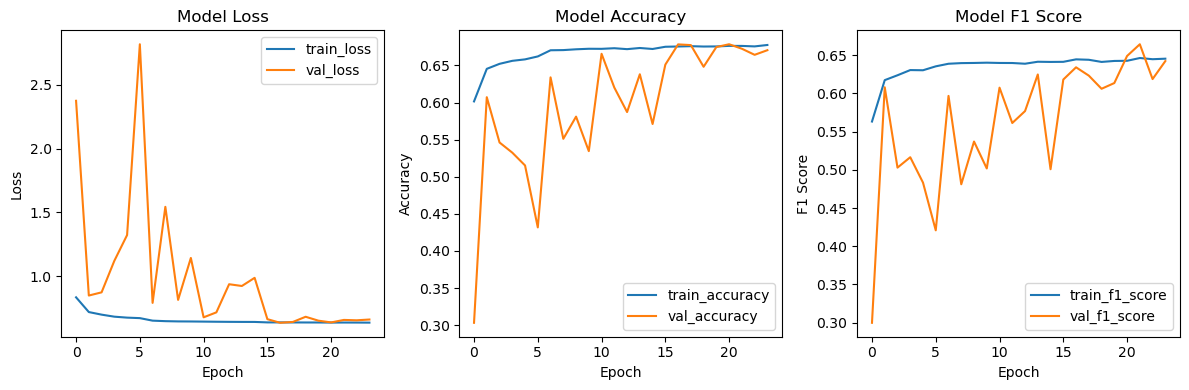

In [9]:
plot_metrics(best_model.history)